#  Assignment 3 and 4

#### In homeworks 3 and 4, you will be required to implement an AlexNet (or similar, as you'll read in the text), train and test it on CIFAR-10 dataset, and gain experience with some regularization techniques such as batch normalization and data augmentation. You may want to treat this as a mini-project, so feel free to collaborate with your project partners for this homework but submit your own code. A typical AlexNet architecture is given below:

Convolutional layer: 96 11 * 11 filters with a stride of 4 

Max pooling: 3 *3 max pooling with a stride of 2

Convolutional layer: 256 5*5 filters with a stride of 2

Max pooling: 3 *3 max pooling with a stride of 2

Convolutional layer: 384 3 * 3 filters with a stride of 1

Convolutional layer: 384 3 * 3 filters with a stride of 1

Convolutional layer: 256 3 * 3 filters with a stride of 1

Max pooling: 3* 3 max pooling with a stride of 2

Fully Connected Layer: 4096 neurons

Fully Connected Layer: 4096 neurons

Fully Connected Layer: **1000** neurons

As a first observation, please note the last fully connected layer consists of 1000 neurons, because AlexNet presented results on a 1000 class problem. Since you are dealing with a 10-class problem, obviously the last layer would consist of 10 neurons. Moreover, for a 10-class problem, it is possible that the three convolutional layers (before the FC layers) might be an overkill. So I'll be open to accepting implementations with a subset of layers in the typical architecture.                                        

In [0]:
## switch to GPU
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

##  (a) Using your favorite framework implement an Alex(Like)Net for 10-class classification, explaining your choice of layers. Do not use batch normalization. You may use drop-out for the fully connected layers. All activation functions would be ReLU.

In [0]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np
from keras import optimizers
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import pickle
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# load the data: train and test
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
# data processing 
x_train = x_train.reshape(-1,3,32,32)/255 # normalization
x_test = x_test.reshape(-1,3,32,32)/255 # normalization
y_train = np_utils.to_categorical(y_train,num_classes = 10)# classif
y_test = np_utils.to_categorical(y_test, num_classes=10)
x_train.shape

(50000, 3, 32, 32)

In [0]:
# Alexnet 5-conv2d 3-fc
model  = Sequential()

In [0]:
# Convolutional layer: 96 11*11 lters with a stride of 4 # 1
model.add(Convolution2D(
    batch_input_shape=(None, 3, 32, 32),
    kernel_size = (11,11),
    filters=96,
    strides=4,
    padding='same',      # Padding method
    data_format='channels_first',
))

# Max pooling: 3*3 max pooling with a stride of 2 # 2
model.add(MaxPooling2D(
    pool_size=(3,3),
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))
# model.add(BatchNormalization()) # Batchnormalization 1
model.add(Activation('relu'))

In [0]:
# Convolutional layer: 256 5*5 lters with a stride of 2 # 3
# Max pooling: 3*3 max pooling with a stride of 2 # 4
model.add(Convolution2D(256,nb_row = 5,nb_col = 5, strides=2, padding='same', data_format='channels_first'))
model.add(MaxPooling2D(pool_size= (3,3), padding = 'same',strides=2,data_format='channels_first'))
# model.add(BatchNormalization()) # Batchnormalization 2
model.add(Activation('relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 5), strides=2, padding="same", data_format="channels_first")`
  """Entry point for launching an IPython kernel.


In [0]:
# Convolutional layer: 384 3*3 lters with a stride of 1 # 5
model.add(Convolution2D(384,kernel_size = (3,3), strides=1, padding='same', data_format='channels_first'))
# model.add(BatchNormalization()) # Batchnormalization 3 
model.add(Activation('relu'))

# Convolutional layer: 384 3*3 lters with a stride of 1 # 6
model.add(Convolution2D(384,kernel_size = (3,3), strides=1, padding='same', data_format='channels_first'))
# model.add(BatchNormalization()) # Batchnormalization 4 
model.add(Activation('relu'))

# Convolutional layer: 256 3 *3 lters with a stride of 1 # 7
model.add(Convolution2D(256,kernel_size = (3,3),  strides=1, padding='same', data_format='channels_first'))
# Max pooling: 3 *3 max pooling with a stride of 2 # 8
model.add(MaxPooling2D(pool_size= (3,3), padding = 'same',strides=2,data_format='channels_first'))
# model.add(BatchNormalization()) # Batchnormalization 5 
model.add(Activation('relu'))

In [0]:
model.add(Flatten())
# Fully Connected Layer: 4096 neurons # 9
model.add(Dense(4069))
model.add(Dropout(0.25))
# model.add(BatchNormalization()) # Batchnormalization 6
model.add(Activation('relu'))
# Fully Connected Layer: 4096 neurons # 10
model.add(Dense(4069))
model.add(Dropout(0.25))
# model.add(BatchNormalization()) # Batchnormalization 7
model.add(Activation('relu'))
# Fully Connected Layer: 10* neurons # 11
model.add(Dense(10)) # 10 classes
# model.add(BatchNormalization()) # Batchnormalization 8
model.add(Activation('softmax')) # for classification
 

#####  The architecture of the Alexnet model used here is shown as the following summary table. 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 96, 8, 8)          34944     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 96, 4, 4)          0         
_________________________________________________________________
activation_17 (Activation)   (None, 96, 4, 4)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 2, 2)         614656    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 256, 1, 1)         0         
_________________________________________________________________
activation_18 (Activation)   (None, 256, 1, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 384, 1, 1)         885120    
__________

## (b) (50 Points) Train the above network on CIFAR-10 (without data augmentation) using RMSProp gradient update (you are not required to implement it, you can use your framework's implementation). Along side, you will have to make appropriate choices for the learning rate, batch size, number of training epochs. Report your results on the test set in the form of confusion matrices.

In [0]:
#opt = Adam(lr = 1e-4)
opt= optimizers.RMSprop(lr=1e-4)

In [0]:
model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# training 
history = model.fit(x_train,y_train,epochs = 150, batch_size = 128,validation_data=(x_test, y_test))## no batch normalization
# validation_data=(x_test, y_test)

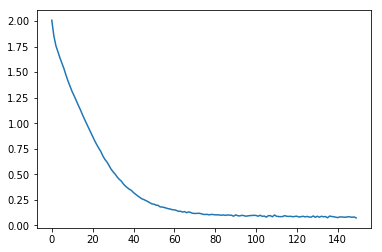

In [0]:
# Loss: convergence or not: Plot the curve
plt.plot(history.history['loss'])
plt.show()

In [0]:
loss, acc = model.evaluate(x_test, y_test)
print ("Test Loss: %s, Test Acc: %s " % (loss, 100*acc))

10000/10000 [==============================] - 1s 127us/step
Test Loss: 4.210114161300659, Test Acc: 50.9 


### confusion matrix

#### the following fucntion is not defined to plot the confusion matrix

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

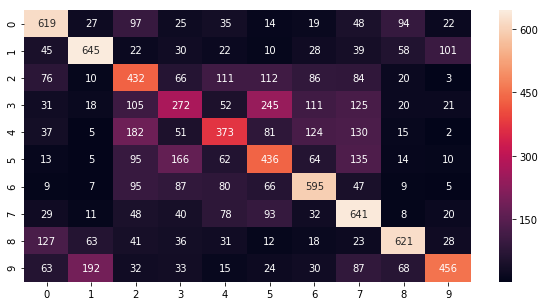

In [0]:
# this function is to show the confusion matrix
def comfusion_matrix_show(model,x_test,y_test):
  # predicted results
  y_pred = model.predict(x_test)
  # get the position of result
  y_pred_classes = np.argmax(y_pred,axis = 1) 
  # get the postion of test data
  y_true = np.argmax(y_test,axis = 1) 
  # compute the confusion matrix
  confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
  plt.figure(figsize=(10,5))
  sns.heatmap(confusion_mtx, annot=True, fmt="d", color = 'g');
  return plt

# compute the confusion matrix
comfusion_matrix_show(model,x_test,y_test)

## (c) (40 Points) Repeat the above with the Adam optimizer. Any noticeable differences in the classification performance?

### Answer:  the model using the Adam optimizer is implemented as following. By comparision with the confusion matrix of the PMSpop optimizer, we can see that the model using Adam optimizer performs better ,and noticeably the model using Adam  increases the  accuracy of  classifying the images with label 3.

In [0]:
# Adm optimizer

opt = Adam(lr = 1e-4)
model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# training 
history2 = model.fit(x_train,y_train,epochs = 100, batch_size = 128)## no batch normalization

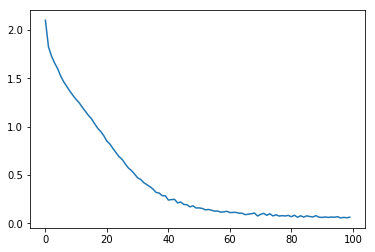

In [0]:
# Loss: convergence or not: Plot the curve
plt.plot(history2.history['loss'])
plt.show()

In [0]:
# the accuracy of the test data
loss, acc = model.evaluate(x_test, y_test)
print ("Test Loss: %s, Test Acc: %s %" % (loss, 100*acc))

10000/10000 [==============================] - 1s 142us/step
Test Loss: 3.347921039199829, Test Acc: 51.93


##### confusion matrix

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

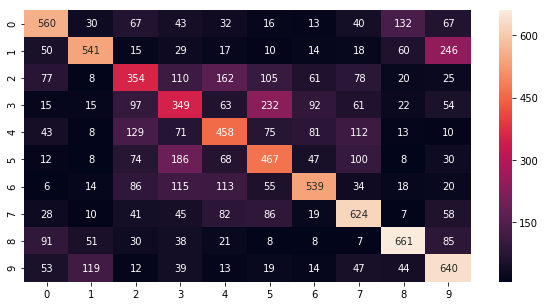

In [0]:
comfusion_matrix_show(model,x_test,y_test)

## (d) (20 Points) Whichever optimization strategy gave better results, randomly select 20 filters from each convolutional layer, and visualize them.

###  Answer： From the results shown by the Confusion matrix  of the trained models using  RMSprop and Adm optimizers,    we can see that the model using the Adm optimizer performs better. The Alexnet I used has 5 convolutional layer, and in the following 20 filters are shown for each convolutional layers.
 
###  I write a simple function aimed to plot 20 filters for each of the five convolutional layers. For convinence, for each convolutional layer, I first select 20 3D filters from the all filters, and then plot a 2D filter with a special depth in each 3d filter. Thus, I get 20 2D filters in each convolutional layer. 

In [0]:
def filter_show_function(layer,n_row,n_col,indicate_start_filters, depth_indicate):
  fig, ax = plt.subplots(n_row, n_col, figsize=(4*5,4*3))
  filters = layer.get_weights()
  row_of_size = filters[0].shape[0] 
  col_of_size = filters[0].shape[1]
  depth_of_filter = filters[0].shape[2]
  n_filters = filters[0].shape[3]
  for row in range(0,n_row):
    for col in range(0,n_col):
      a = filters[0]
      a1 = 20*a[:,:,:,indicate_start_filters]
      a2 = a1.reshape(row_of_size,col_of_size,depth_of_filter)
      a3 = a2[:,:,depth_indicate]
      ax[row][col].imshow (a3,cmap = 'gray')
      indicate_start_filters+=1
  return plt

n_row = 4 # number of the plots in row 
n_col = 5 # number of the plots in col
indicate_start_filters = 60 # the first 3d filters selected 
depth_indicate = 2; # the depth/channel of the slice selected in each 3d filter 

### Conv Layer  1

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

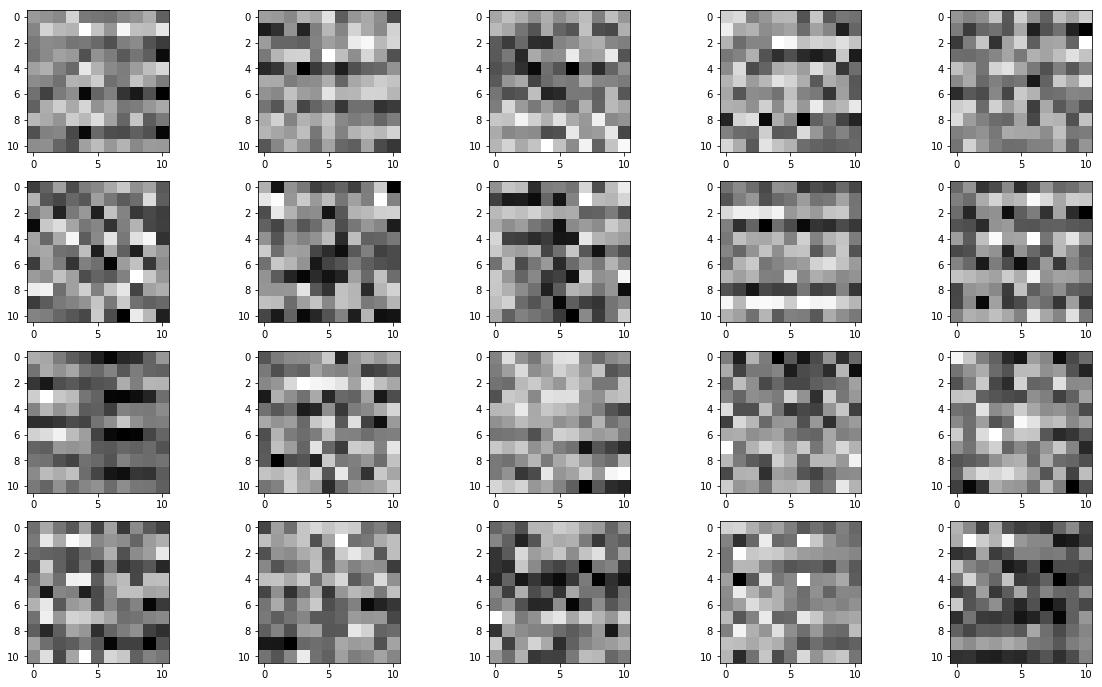

In [0]:
# layer 0 one channel
# filters (11, 11, 3, 96)

layer = model.layers[0];
filter_show_function(layer,n_row,n_col,n_filters, depth_indicate)

###  Conv Layer  2

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

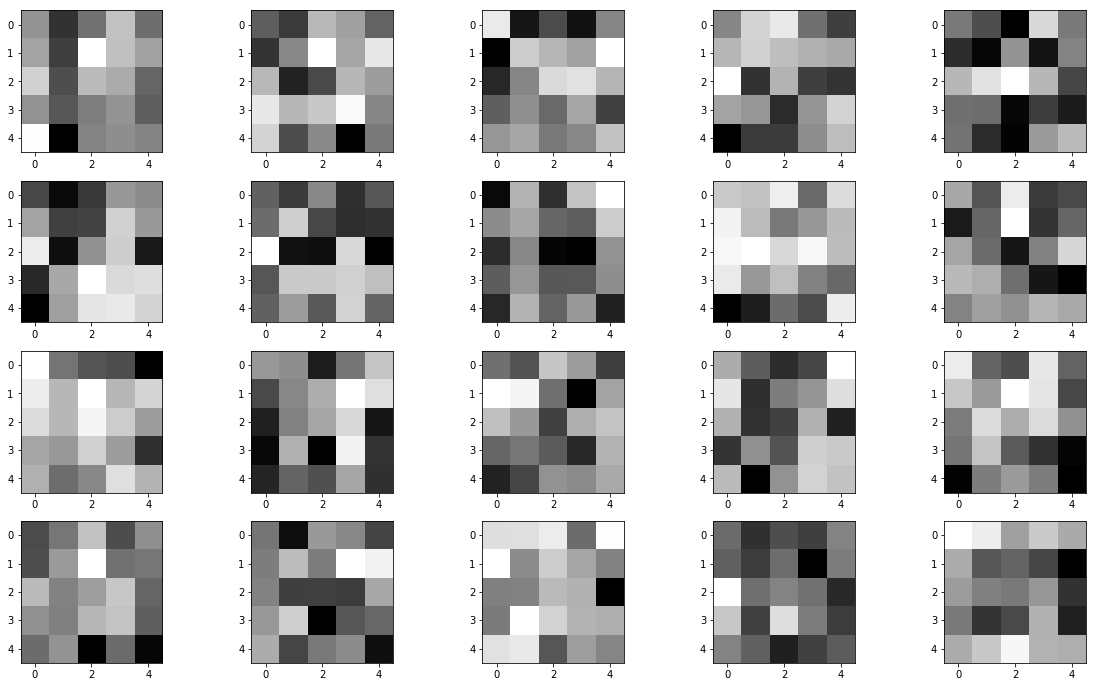

In [0]:
# 3 second conv layer
# 5*5*96*256

layer = model.layers[3];
filter_show_function(layer,n_row,n_col,n_filters, depth_indicate)

### Conv layer 3

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

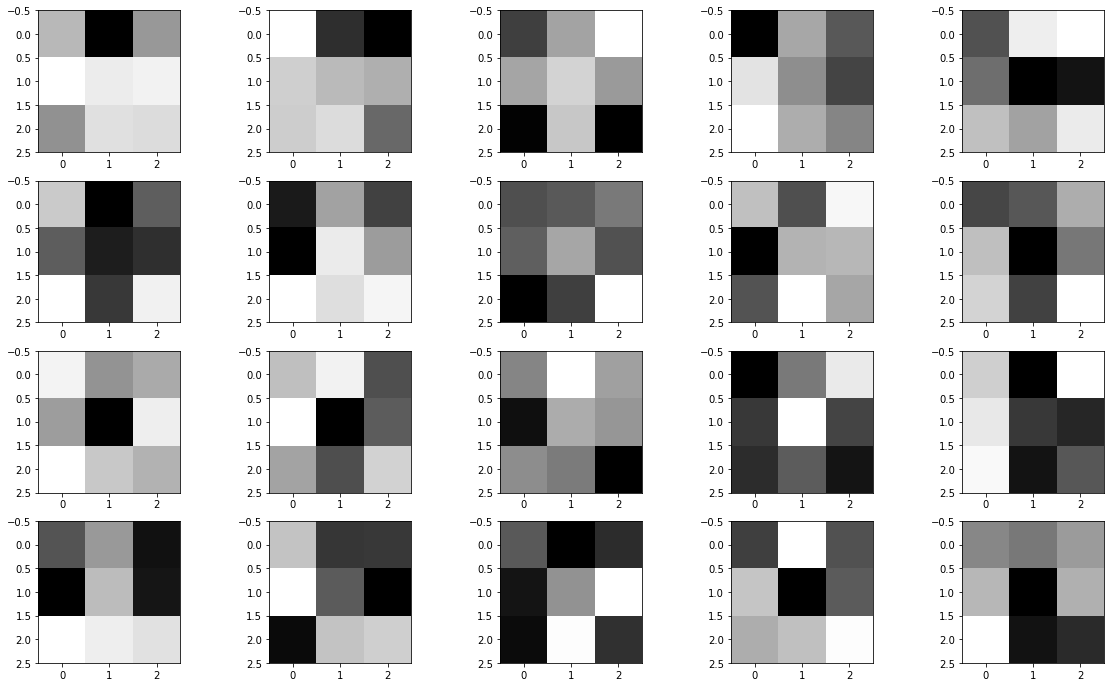

In [0]:
##  conv is the 6 
# (3, 3, 256, 384)
layer = model.layers[6];
filter_show_function(layer,n_row,n_col,n_filters, depth_indicate)
# conv is the 0  3 6 8 10 th layer

### Conv layer 4

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

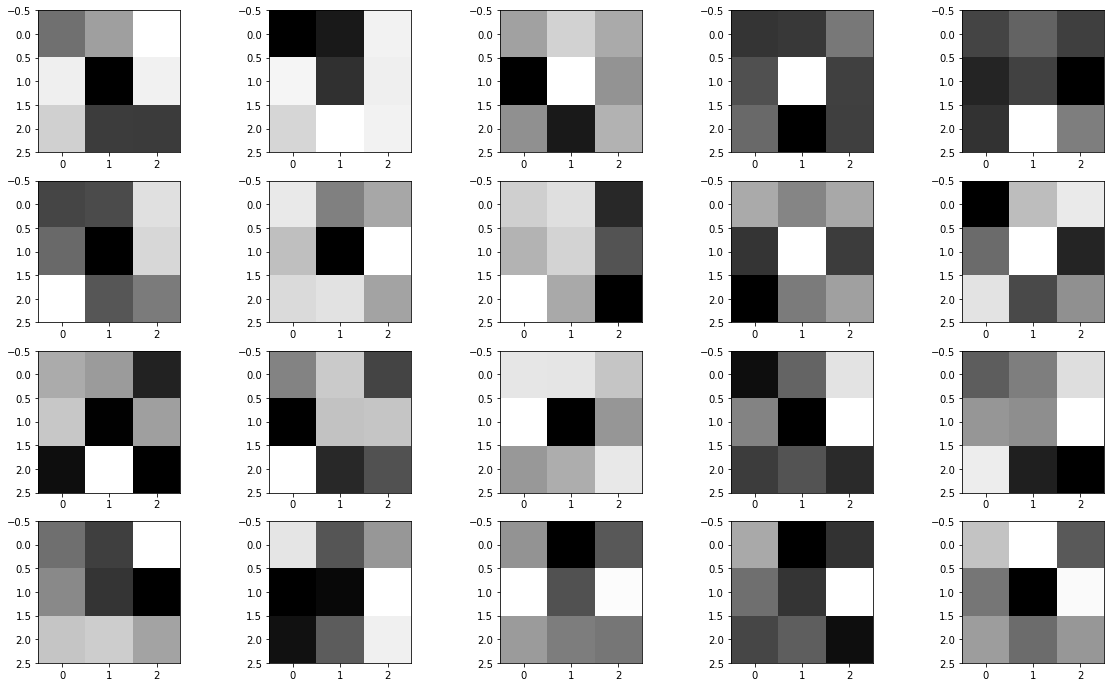

In [0]:
##  conv is the 8 
# (3, 3, 384, 384)

layer = model.layers[8];
filter_show_function(layer,n_row,n_col,n_filters, depth_indicate)
# conv is the 0  3 6 8 10 th layer

### Conv layer 5

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

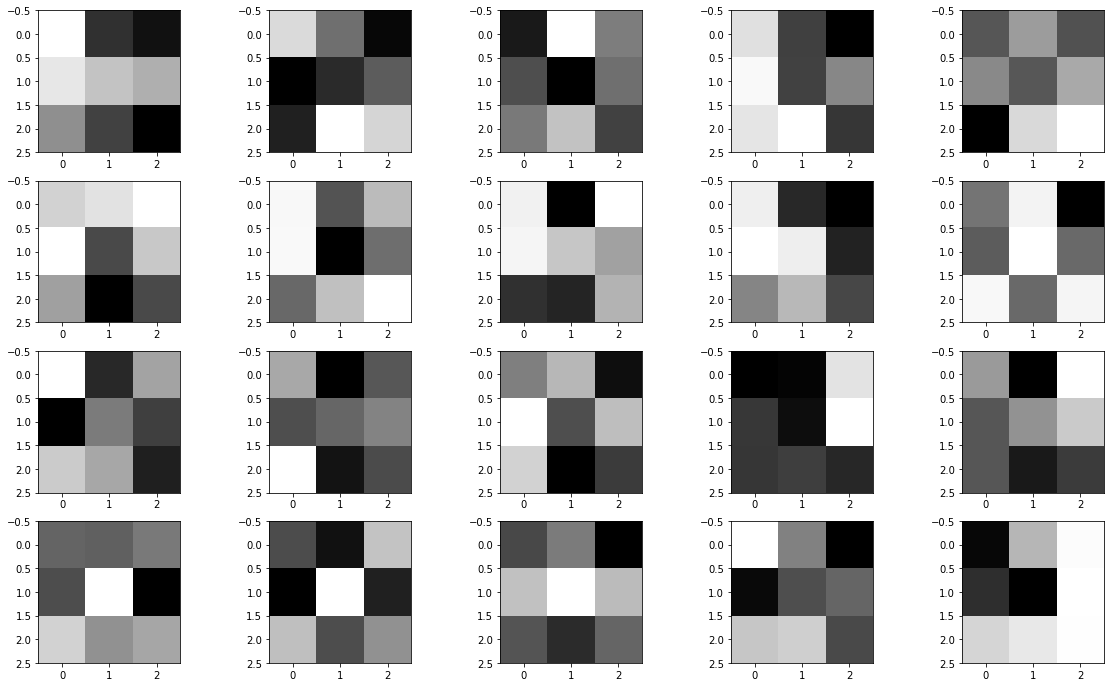

In [0]:
##  conv is the 10 
#(3, 3, 384, 384)

layer = model.layers[10];
filter_show_function(layer,n_row,n_col,n_filters, depth_indicate)
# conv is the 0  3 6 8 10 th layer

## (e) (30 Points) Now add batch normalization. Make appropriate choice where to add batch normalization. Remember it has to be added before a non-linearity, i.e.  to be inserted after a convolutional layer before the non-linearity;  or after a fully connected layer before the non-linearity. Retrain and report results.

In [0]:
# Alexnet 5-conv2d 3-fc
model  = Sequential()

# Convolutional layer: 96 11*11 lters with a stride of 4 # 1
model.add(Convolution2D(
    batch_input_shape=(None, 3, 32, 32),
    kernel_size = (11,11),
    filters=96,
    strides=4,
    padding='same',      # Padding method
    data_format='channels_first',
))

# Max pooling: 3*3 max pooling with a stride of 2 # 2
model.add(MaxPooling2D(
    pool_size=(3,3),
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))
model.add(BatchNormalization()) # Batchnormalization 1
model.add(Activation('relu'))

# Convolutional layer: 256 5*5 lters with a stride of 2 # 3
# Max pooling: 3*3 max pooling with a stride of 2 # 4
model.add(Convolution2D(256,nb_row = 5,nb_col = 5, strides=2, padding='same', data_format='channels_first'))
model.add(MaxPooling2D(pool_size= (3,3), padding = 'same',strides=2,data_format='channels_first'))
model.add(BatchNormalization()) # Batchnormalization 2
model.add(Activation('relu'))

# Convolutional layer: 384 3*3 lters with a stride of 1 # 5
model.add(Convolution2D(384,kernel_size = (3,3), strides=1, padding='same', data_format='channels_first'))
model.add(BatchNormalization()) # Batchnormalization 3 
model.add(Activation('relu'))

# Convolutional layer: 384 3*3 lters with a stride of 1 # 6
model.add(Convolution2D(384,kernel_size = (3,3), strides=1, padding='same', data_format='channels_first'))
model.add(BatchNormalization()) # Batchnormalization 4 
model.add(Activation('relu'))

# Convolutional layer: 256 3 *3 lters with a stride of 1 # 7
model.add(Convolution2D(256,kernel_size = (3,3),  strides=1, padding='same', data_format='channels_first'))
# Max pooling: 3 *3 max pooling with a stride of 2 # 8
model.add(MaxPooling2D(pool_size= (3,3), padding = 'same',strides=2,data_format='channels_first'))
model.add(BatchNormalization()) # Batchnormalization 5 
model.add(Activation('relu'))

model.add(Flatten())
# Fully Connected Layer: 4096 neurons # 9
model.add(Dense(4069))
model.add(Dropout(0.25))
model.add(BatchNormalization()) # Batchnormalization 6
model.add(Activation('relu'))
# Fully Connected Layer: 4096 neurons # 10
model.add(Dense(4069))
model.add(Dropout(0.25))
model.add(BatchNormalization()) # Batchnormalization 7
model.add(Activation('relu'))
# Fully Connected Layer: 10* neurons # 11
model.add(Dense(10)) # 10 classes
model.add(BatchNormalization()) # Batchnormalization 8
model.add(Activation('softmax')) # for classification
 
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 5), strides=2, padding="same", data_format="channels_first")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 8, 8)          34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 96, 4, 4)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 96, 4, 4)          16        
_________________________________________________________________
activation_9 (Activation)    (None, 96, 4, 4)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 2, 2)         614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 256, 1, 1)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 256, 1, 1)         4         
__________

In [0]:
# Adm optimizer
opt = Adam(lr = 1e-4) 
model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# training 
history = model.fit(x_train,y_train,epochs = 100, batch_size = 128,validation_data=(x_test, y_test))## with batch normalization
# validation_data=(x_test, y_test)

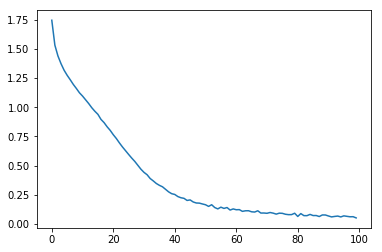

10000/10000 [==============================] - 1s 141us/step
Test Loss: 2.8916920860290527, Test Acc: 54.09 


In [0]:
# plot the loss vs epochs curve and print the loss and accuracy of the test data
plt.plot(history.history['loss'])
plt.show()

loss, acc = model.evaluate(x_test, y_test)
print ("Test Loss: %s, Test Acc: %s " % (loss, 100*acc))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

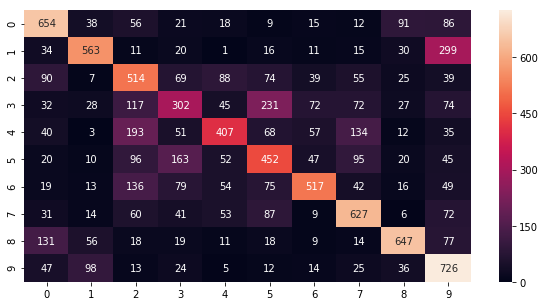

In [0]:
# show the confusion matrix for the Test data (1000*10)

comfusion_matrix_show(model,x_test,y_test)

##  (f) (30 Points) Add mirrored versions (flipped about the vertical axis) of all training images to your training data. Retrain and report results.

In [0]:
# Add mirrored versions to the original data to get the 100000 new data
 
x_train_flip =  np.flip(x_train, 1)
x_train_new = np.concatenate((x_train, x_train_flip), axis=0) # Totally 100000
y_train_new = np.concatenate((y_train, y_train), axis=0)

# y_train_new.shape

(100000, 10)

In [0]:
opt = Adam(lr = 1e-4) 
model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# training 
history = model.fit(x_train_new,y_train_new,epochs = 150, batch_size = 128,validation_data=(x_tes, y_test))## with batch normalization

# validation_data=(x_test, y_test)

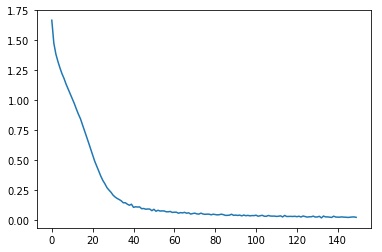

10000/10000 [==============================] - 1s 140us/step
Test Loss: 3.4130709426879884, Test Acc: 54.17999999999999 


In [0]:
# plot the loss vs epochs curve and print the loss and accuracy of the test data
plt.plot(history.history['loss'])
plt.show()
loss, acc = model.evaluate(x_test, y_test)
print ("Test Loss: %s, Test Acc: %s " % (loss, 100*acc))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

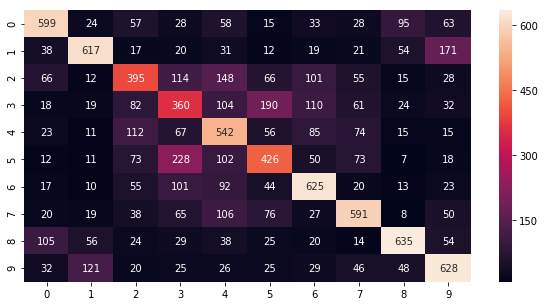

In [0]:
# show the confusion matrix for the Test data (1000*10)

comfusion_matrix_show(model,x_test,y_test)
